In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
# Here ham: Not Spam

In [5]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
# Here top gives the frequent categorical value.

In [9]:
df.groupby(by='Category')

In [11]:
df.groupby(by='Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [12]:
# Now we want to convert the categorical features into numeric features. First we are going to convert the Category column.
# Since it contains categorical values Spam and Ham, we can use get_dummies() to split them or create a function such that
# it returns 1 if spam and returns 0 if Ham using the apply() method.

In [13]:
# Pandas.apply allow the users to pass a function and apply it on every single value of the Pandas series. It comes as a 
# huge improvement for the pandas library as this function helps to segregate data according to the conditions required due
# to which it is efficiently used in data science and machine learning.

In [14]:
def func(x):
    if x=='ham':
        return 0
    else:
        return 1

In [16]:
df1=df.copy()
df1['Spam']=df['Category'].apply(func)
df1

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [20]:
# You can use a function to do this or simply use inline function called lambda(). lamda() function returns the value entered
# in it.

In [21]:
# Demonstration of lambda function:
df2=df.copy()
df2['Spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)

In [22]:
df2

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [23]:
# Now you can drop Category column

In [24]:
df2.drop(columns='Category',inplace=True)
df2

,Message,Spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


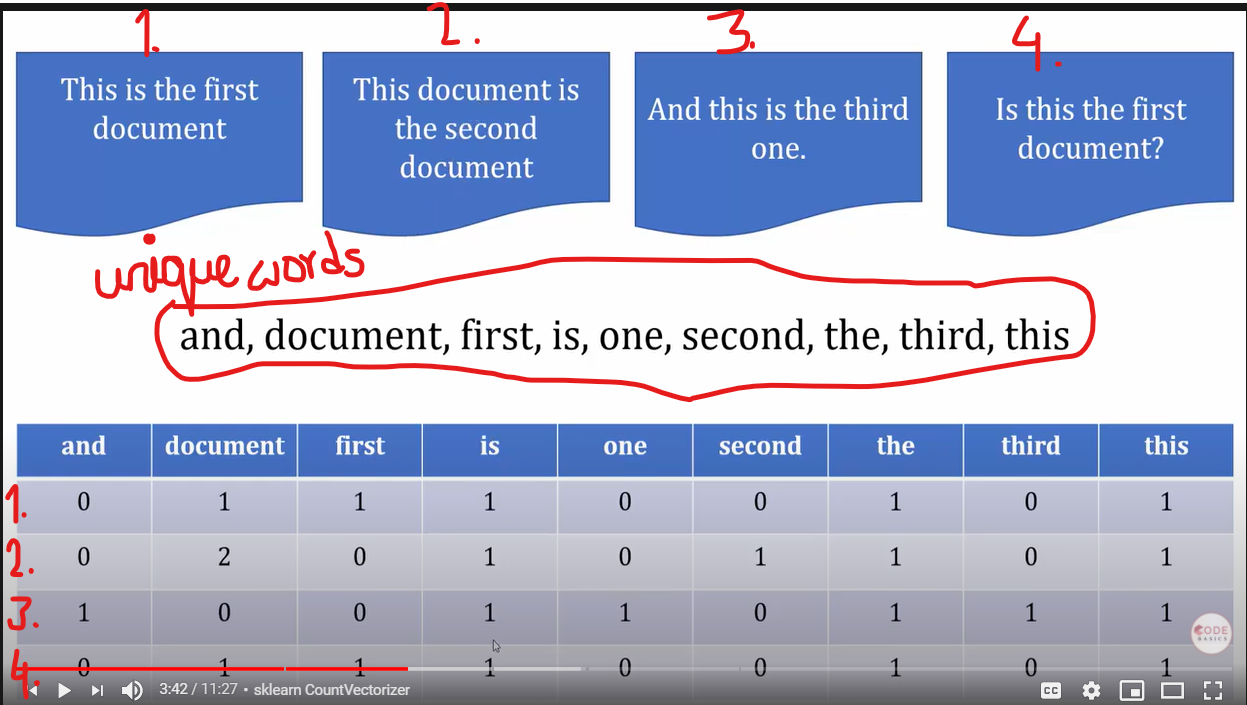

In [25]:
# Now we have to convert the messages into numeric format. To do this we use sklearn Count Vectorizer.
# Working of Vectorizer:
from IPython.display import Image
Image("Vectorizer.png",width=800)

In [26]:
# Consider 4 documents (labelled as 1,2,3,4). To convert these four documents into numeric format we use sklearn
# Count Vectorizer. Count Vectorizer first finds the unique words in all the documents and makes a table out of it with the
# columns containing each unique word. Now it marks the no. of times each word is being repeated in each document.
# Ex: 'and': In the 1st document there is no word 'and' and hence its value is zero. Similarly 2nd document it is 0,
#            3rd document it is 1 and 4th document it is 0.
# Similarly the word 'document' is repeated one time for 1st document, two times for 2nd document, zero times for 3rd document
# and one time for 4th document.
# Similarly the table is filled.

In [27]:
# First we split the dataset into train and test data:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(df2['Message'],df2['Spam'],test_size=0.25)

In [29]:
X_train

5489          Oh thanks a lot..i already bought 2 eggs ..
5259    Can help u swoop by picking u up from wherever...
2941     You have 1 new message. Please call 08712400200.
3738    Plz note: if anyone calling from a mobile Co. ...
4208                   Lets use it next week, princess :)
                              ...                        
523                          Were gonna go get some tacos
4068    You are being contacted by our Dating Service ...
1941    Dude avatar 3d was imp. At one point i thought...
388                        Mm that time you dont like fun
3632               Thank you princess! You are so sexy...
Name: Message, Length: 4179, dtype: object

In [30]:
y_train

5489    0
5259    0
2941    1
3738    0
4208    0
       ..
523     0
4068    1
1941    0
388     0
3632    0
Name: Spam, Length: 4179, dtype: int64

In [34]:
# CountVectorizer fits and transform 1D array. So we convert the 2D array (X) into 1D array using .values
# The following 1D array with msgs is named as Corpus.
X_train.values

array(['Oh thanks a lot..i already bought 2 eggs ..',
       'Can help u swoop by picking u up from wherever ur other birds r meeting if u want.',
       'You have 1 new message. Please call 08712400200.', ...,
       'Dude avatar 3d was imp. At one point i thought there were actually flies in the room and almost tried hittng one as a reflex',
       'Mm that time you dont like fun',
       'Thank you princess! You are so sexy...'], dtype=object)

In [31]:
# Now we convert the messages into numeric data.

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
cv=CountVectorizer()

In [36]:
sparse_matrix_msgs=cv.fit_transform(X_train.values)
sparse_matrix_msgs

<4179x7539 sparse matrix of type '<class 'numpy.int64'>'
	with 55664 stored elements in Compressed Sparse Row format>

In [37]:
# To see that sparse matrix, we use toarray() method
sparse_matrix_msgs.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

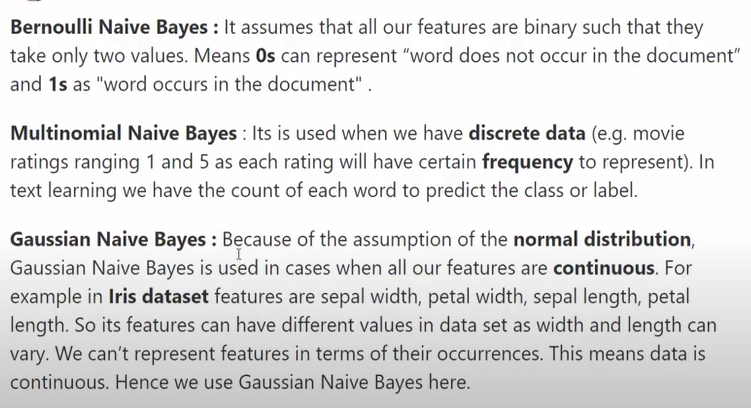

In [38]:
# Naive Baye's types:
Image("types.png",width=800)

In [39]:
# Bernoulli Naive Bayes: When our features contain 0 or 1 (i.e., Binary type), we use Bernoulli Naive Bayes.
# Multinomial Naive Bayes: When your features contain many discrete features, we use Multinomial Naive Bayes.
# Gaussian Naive Bayes: When the features contain a Gaussian distribution (or it has continuous values),
#                       we use Gaussian Naive Bayes. Ex: Height, age, length,width etc.

In [40]:
# We are going to use Multinomial Naive Bayes for this problem.

In [41]:
# Now we fit the model:

In [42]:
from sklearn.naive_bayes import MultinomialNB

In [43]:
model=MultinomialNB()

In [44]:
model.fit(sparse_matrix_msgs,y_train)

MultinomialNB()

In [45]:
# Now we can predict our model:

In [46]:
emails=['Hey Sagar, lets play cricket tomorrow','Upto 20% discount on shopping from Amazon']
emails_sparse=cv.transform(emails)

In [47]:
emails_sparse

<2x7539 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [48]:
model.predict(emails_sparse)

array([0, 1], dtype=int64)

In [49]:
# From this, we can say that first email is not spam and second email is spam.

In [50]:
# Lets measure the accuracy of our model:
model.score(cv.transform(X_test.values),y_test)

0.9813352476669059

In [51]:
# You can see that our model performs really well on classifying emails as spam or not spam.

In [52]:
# You can see that steps like converting the email into sparse matrix and then testing it are repeative. So we create a
# pipeline to avoid this inconvinience.

In [53]:
from sklearn.pipeline import Pipeline

In [56]:
# First we give the steps to the pipeline
pipe=Pipeline([('Vectorizer',CountVectorizer()),('MultinomialNB',MultinomialNB())])

In [58]:
# Now we fit the pipeline
pipe.fit(X_train,y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('MultinomialNB', MultinomialNB())])

In [59]:
pipe.score(X_test,y_test)

0.9813352476669059

In [60]:
pipe.predict(emails)

array([0, 1], dtype=int64)

In [61]:
# You will notice that creating a pipeline reduces the task. It also avoids data leakage.